# Sender
----

In [40]:
# imported libraries
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from lib.conversion import *
from lib.encrypt import *
from lib.PRBG import *
from lib.measurement import *

In [41]:
# read an image file
# lena
img = cv.imread('test-images/miscellaneous/4.1.04.tiff', cv.IMREAD_GRAYSCALE)
print("Image document type is: {}".format(img.dtype))

Image document type is: uint8


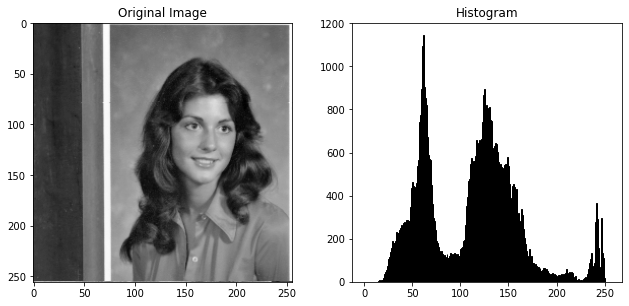

In [42]:
# showing image using matplotlib
plt.subplots_adjust(bottom=0.1, right=1.5, top=1)

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title("Histogram")
plt.hist(img.ravel(), bins=256, range=(0, 255), fc='k', ec='k')
plt.show()

In [43]:
# getting image height and width
height = img.shape[0]
width = img.shape[1]
print("height: {}, width: {}".format(height, width))

height: 256, width: 256


### Bitplanes Decomposition

In [44]:
# obtaining bitplanes
encp = Encryption()
bitplane_images = encp.bitplane_decomposition(img, height, width)
titles = ['bitplane8',
          'bitplane7',
          'bitplane6',
          'bitplane5',
          'bitplane4',
          'bitplane3',
          'bitplane2',
          'bitplane1']

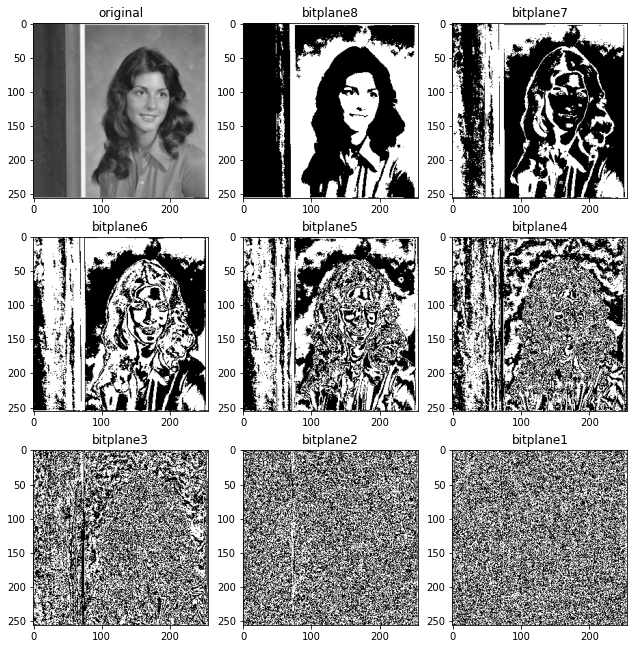

In [45]:
# viewing bitplane images
plt.subplot(3,3,1)
plt.title('original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

for i in range(8):
    plt.subplot(3,3,i+2)
    plt.title(titles[i])
    plt.imshow(convert_to_255(bitplane_images[i]), cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)

### Cipher Image Generation

In [46]:
# CCCBG
diffusion_range = 5
cccbg = CCCBG(.5, .7)

mats = []
for i in range(diffusion_range):
    bitplane_images[i] = cv.bitwise_xor(cccbg.generateMatrix(height, width), bitplane_images[i])
    mats.append(cccbg.generateMatrix(height, width))

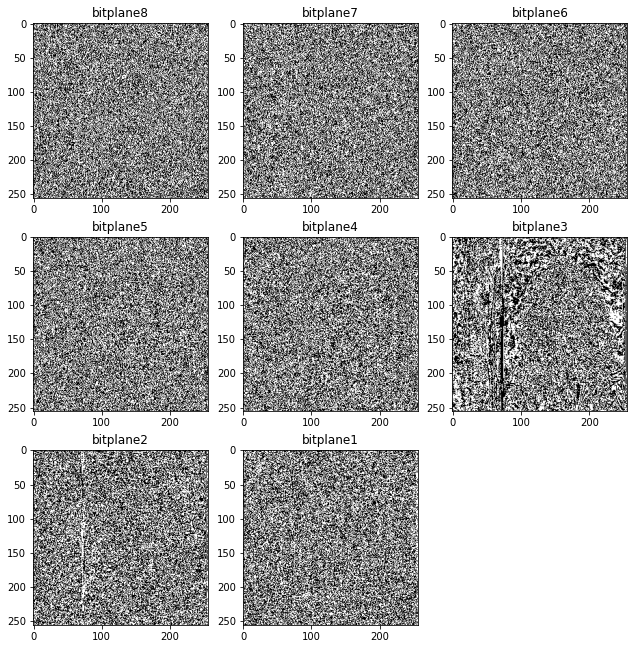

In [47]:
# viewing bitplane images
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.title(titles[i])
    plt.imshow(convert_to_255(bitplane_images[i]), cmap='gray', vmin=0, vmax=255)
plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2) 

True

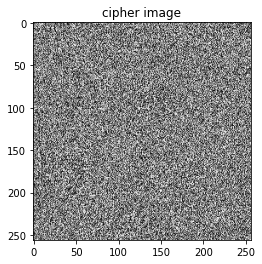

In [48]:
cipher_image = cipher_image_composition(bitplane_images, height, width)
plt.title('cipher image')
plt.imshow(cipher_image, cmap='gray')

cv.imwrite('cipherImage.tiff', cipher_image)

# Statistical Analysis
----

## Histogram Analysis

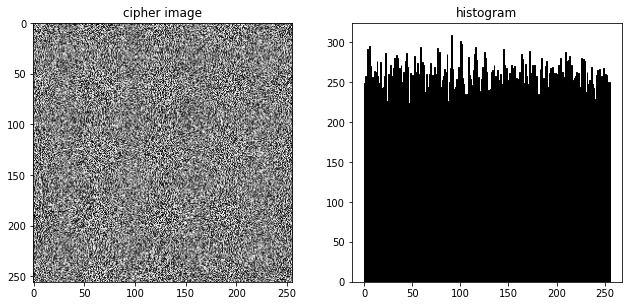

In [49]:
# histogram analysis
plt.subplots_adjust(bottom=0.1, right=1.5, top=1)

plt.subplot(1,2,1)
plt.title('cipher image')
plt.imshow(cipher_image, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('histogram')
plt.hist(cipher_image.ravel(), bins=256, range=(0, 255), fc='k', ec='k')

plt.show()

## Measures of Central Tendency

A measure of central tendency is a summary statistic that represents the center point or typical value of a dataset. These measures indicate where most values in a distribution fall and are also referred to as the central location of a distribution.

**Mean:**
The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar. To calculating the mean, we need to just add up all of the values and divide by the number of observations in your dataset.

**Median:**
The median is the middle value. It is the value that splits the dataset in half. To find the median, order we need to the data from smallest to largest, and then find the data point that has an equal amount of values above it and below it. 

In [50]:
print("Mean original: {}".format(np.mean(img)))
print("Mean cipher: {}".format(np.mean(cipher_image)))

Mean original: 111.17927551269531
Mean cipher: 127.26216125488281


In [51]:
print("Median original: {}".format(np.median(img)))
print("Median cipher: {}".format(np.median(cipher_image)))

Median original: 118.0
Median cipher: 127.0


## Measure of Dispersion

Standard deviation (SD) is the most commonly used measure of dispersion. It is a measure of spread of data about the mean. SD is the square root of sum of squared deviation from the mean divided by the number of observations. Statistical dispersion means the extent to which numerical data is likely to vary about an average value.

In [52]:
print("Standard Derivation of original: {}".format(np.std(img)))
print("Standard Derivation of cipher: {}".format(np.std(cipher_image)))

Standard Derivation of original: 49.64924558805903
Standard Derivation of cipher: 73.85180349530175


## Corellation Coefficient


In [53]:
measurement = Measurement()
print('Original vs Cipher: {}'.format(measurement.corr2(img, cipher_image)))

Original vs Cipher: 0.0012280354655566906


In [54]:
print('Horizontal adjacent original vs original: {}'
      .format(measurement.corr2(img, horizontal_adj(img, height, width))))

Horizontal adjacent original vs original: 1.0


In [55]:
print('Horizontal adjacent cipher vs cipher: {}'
      .format(measurement.corr2(cipher_image, horizontal_adj(cipher_image, height, width))))

Horizontal adjacent cipher vs cipher: 1.0


## Scatter Plot Analysis

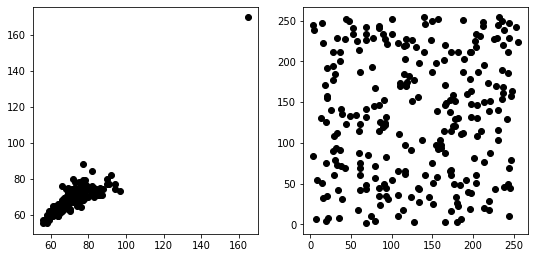

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 3.5))
fig.subplots_adjust(bottom=0.1, right=1.5, top=1)
ax[0].scatter(img[:, 0],img[:, 1],color='black')
ax[1].scatter(cipher_image[0,],cipher_image[1,],color='black')
plt.show()

## Entropy

In [57]:
# calculate entropy of the image
print('Entropy of the original image: {:.2f}'.format(entropy(img)))
print('Entropy of the cipher image: {:.2f}'.format(entropy(cipher_image)))

Entropy of the original image: 7.93
Entropy of the cipher image: 7.94


## Measurements

In [58]:
mse = measurement.MSE(img, cipher_image, img.shape)
psnr = measurement.PSNR(img, cipher_image, mse)
print("MSE: {} DB".format(mse))
print("PSNR: {} DB".format(psnr))

MSE: 20810.1640625 DB
PSNR: 4.948048567659628 DB
